<a href="https://colab.research.google.com/github/simonhosea/semoga-sukses/blob/main/Final_Project_Bank_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

Kami bertujuan untuk melengkapi hal-hal berikut untuk penelitian ini:

Identifikasi dan visualisasikan faktor mana yang berkontribusi terhadap churn pelanggan:

Bangun model prediksi yang akan melakukan hal berikut:

Mengklasifikasikan apakah pelanggan akan melakukan churn atau tidak
Lebih disukai dan berdasarkan kinerja model, pilih model yang akan melampirkan probabilitas pada churn untuk memudahkan layanan pelanggan menargetkan buah yang menggantung rendah dalam upaya mereka mencegah churn

Feature Description:

Customer ID - Unique ID given to identify a particular customer.

Credit Score - It is the score which determines the creditworthiness of a customer.

Country - The country where customer lives.

Gender - The Sex of customer.

Age - The age of customer.

Tenure - Number of years the customer has Bank Account in that Bank.

Balance - Amount of money present in customer's bank.

Products Number - Number of Products from that Bank.

Credit Card - Does the customer own a credit card of that Bank.

Active Member - Whether the customer is an active member of that Bank.

Estimated Salary - Total Income of the Customer.

Churn - Churn (Loss of existing customers) of the Bank.

# 2. Data Set review & Preparation

Pada bagian ini kita akan berusaha untuk mengeksplorasi struktur data kami:

Untuk memahami ruang input kumpulan data
Dan untuk menyiapkan set untuk tugas eksplorasi dan prediksi seperti yang dijelaskan di bagian 1

In [4]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [6]:
# Read the data frame
df = pd.read_csv('/content/Bank Customer Churn Prediction.csv', delimiter=',')
df.shape

(10000, 12)

Df memiliki 1000 baris dengan 12 atribut. Kami meninjau ini lebih lanjut untuk mengidentifikasi atribut apa yang diperlukan dan manipulasi data apa yang perlu dilakukan sebelum analisis Eksplorasi dan pemodelan prediksi

In [7]:
# Check columns list and missing values
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Yeayy ! Tidak ada Missing Values.


In [8]:
# Get unique count for each variable
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [9]:
#Drop the columns as explained above
df = df.drop(["customer_id"], axis = 1)

Variabel pertama customer_id jelas tidak memiliki pengaruh apa pun pada apakah pelanggan kemungkinan akan churn atau tidak, sehingga harus dihapus dari kumpulan data untuk menghindari munculnya gangguan yang tidak perlu pada model klasifikasi kami.

In [10]:
# Review the top rows of what is left of the data frame
df.head()


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# Check variable data types
df.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

So we moslty have categorical variables and 5 continuous variables

# 3. Exploratory Data Analysis

Here our main interest is to get an understanding as to how the given attributes relate too the 'churn' status.

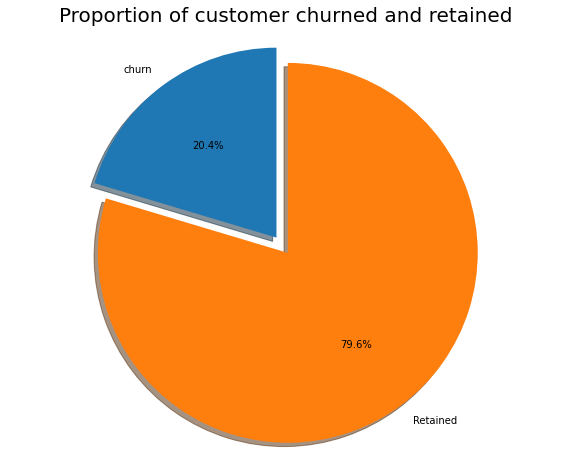

In [12]:
labels = 'churn', 'Retained'
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

Jadi sekitar 20% dari pelanggan telah bergejolak. Jadi model dasarnya bisa memprediksi bahwa 20% pelanggan akan berhenti. Mengingat 20% adalah angka kecil, kami perlu memastikan bahwa model yang dipilih benar-benar memprediksi dengan sangat akurat 20% ini karena menarik bagi bank untuk mengidentifikasi dan mempertahankan kumpulan ini sebagai lawan memprediksi secara akurat pelanggan yang dipertahankan.

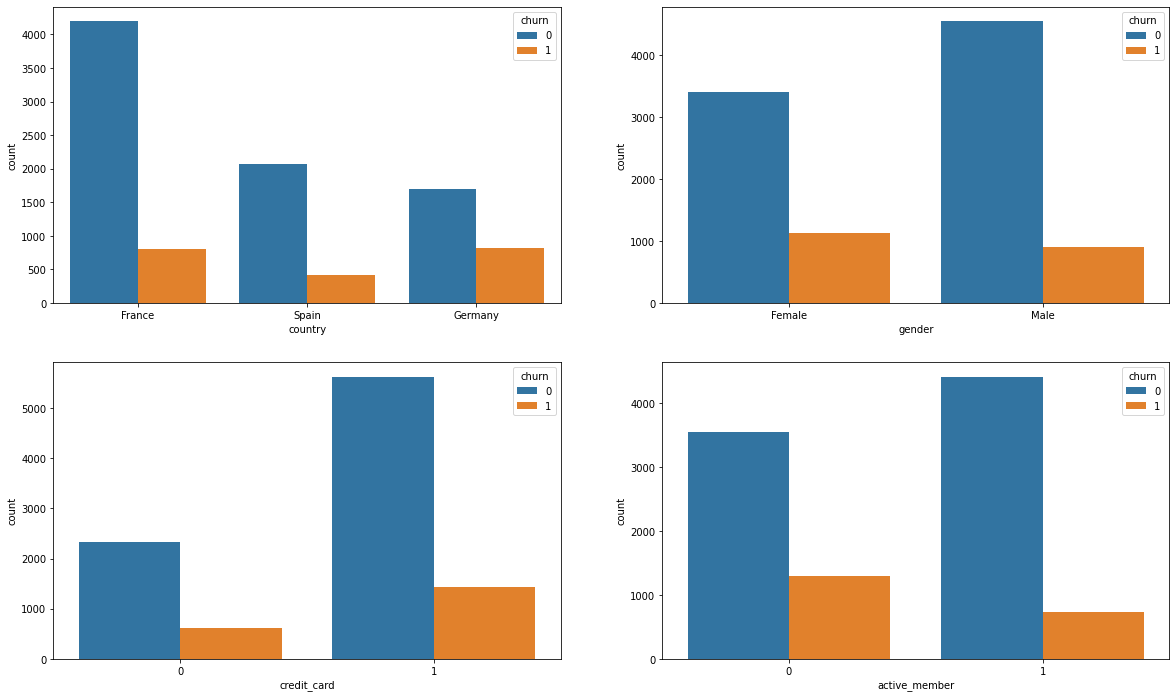

In [15]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='country', hue = 'churn',data = df, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'churn',data = df, ax=axarr[0][1])
sns.countplot(x='credit_card', hue = 'churn',data = df, ax=axarr[1][0])
sns.countplot(x='active_member', hue = 'churn',data = df, ax=axarr[1][1])